<a href="https://colab.research.google.com/github/nkn201996/Story/blob/master/Navin_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
cols=[]
for i in range(33):
  cols.append(i)

In [ ]:
df=pd.read_csv('data.csv')

df.columns=cols
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


#Some information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5000 non-null   int64
 1   1       5000 non-null   int64
 2   2       5000 non-null   int64
 3   3       5000 non-null   int64
 4   4       5000 non-null   int64
 5   5       5000 non-null   int64
 6   6       5000 non-null   int64
 7   7       5000 non-null   int64
 8   8       5000 non-null   int64
 9   9       5000 non-null   int64
 10  10      5000 non-null   int64
 11  11      5000 non-null   int64
 12  12      5000 non-null   int64
 13  13      5000 non-null   int64
 14  14      5000 non-null   int64
 15  15      5000 non-null   int64
 16  16      5000 non-null   int64
 17  17      5000 non-null   int64
 18  18      5000 non-null   int64
 19  19      5000 non-null   int64
 20  20      5000 non-null   int64
 21  21      5000 non-null   int64
 22  22      5000 non-null   int64
 23  23      5000 

##Some statistics about the data

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.000000
mean,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.181000,0.409800,0.409800,0.488200,0.488200,0.488200,0.49940,0.49940,0.49940,0.49940,0.50020,0.50020,0.50020,0.434000
std,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.385057,0.491846,0.491846,0.499911,0.499911,0.499911,0.50005,0.50005,0.50005,0.50005,0.50005,0.50005,0.50005,0.495674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000


##Exploratory Data Analysis

##Some Class imbalance in the data:which will be handled by Upsampling the minority class

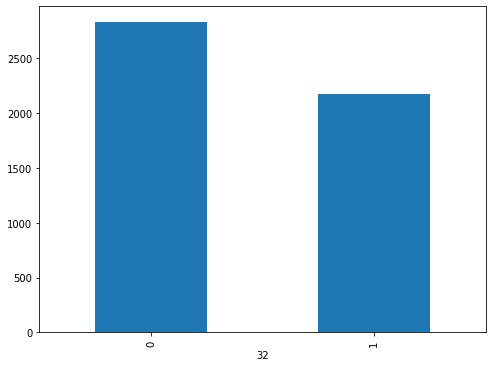

In [ ]:
result = df[32].groupby(df[32]).count()

result.plot(kind='bar',figsize=(8, 6))

##Some random Feature exploration

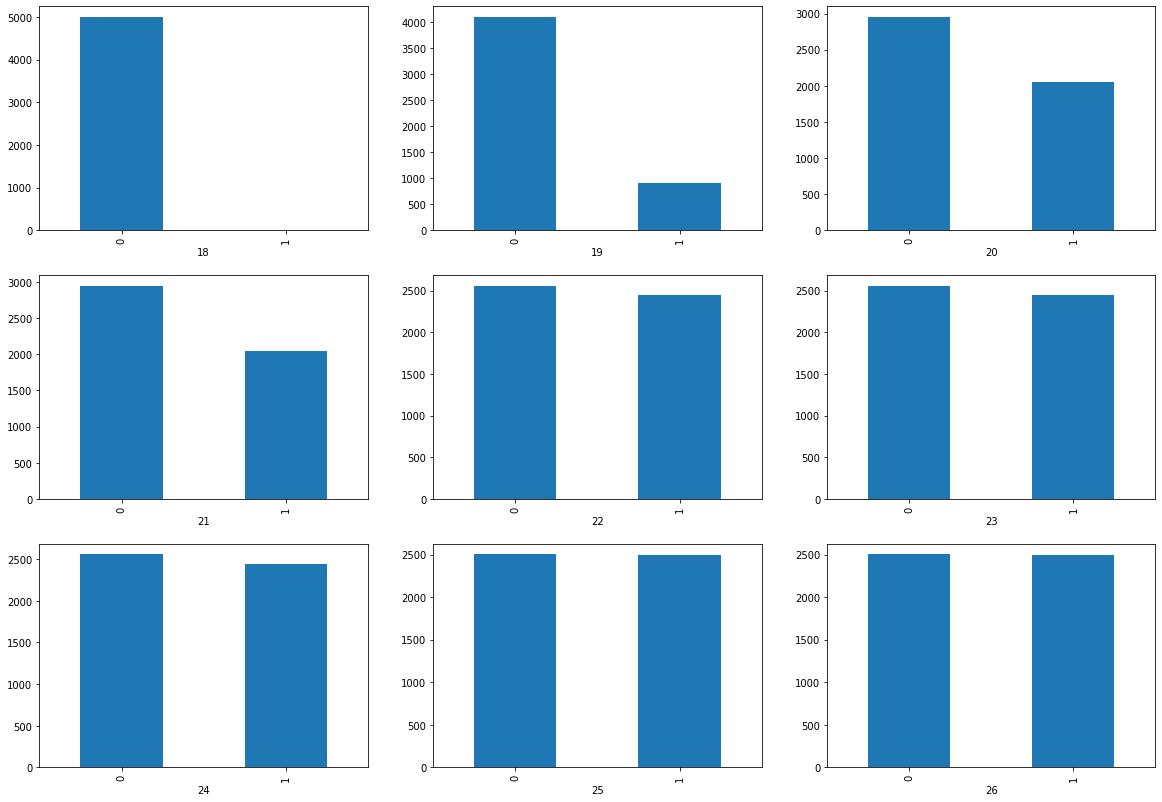

In [ ]:
count=0
for i in range(18,27):
  count+=1
  plt.subplot(3, 3, count)
  plt.xlabel(str(i)+'class')
  result = df[i].groupby(df[i]).count()

  result.plot(kind='bar',figsize=(20, 14))

##Corelation of Classes

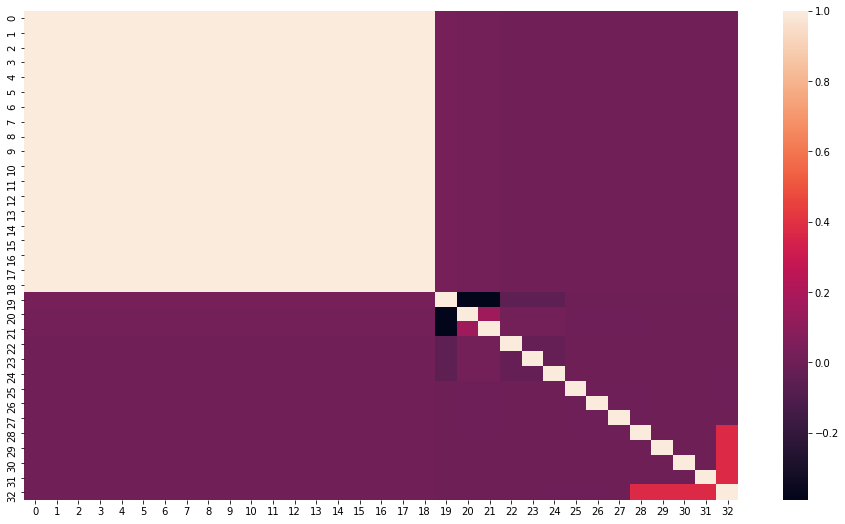

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr())

Features corelation with the decision class

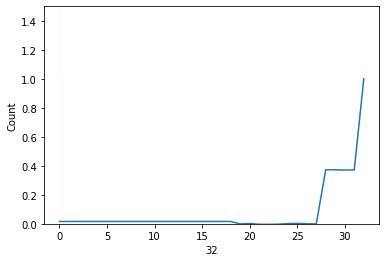

In [ ]:
plt.plot(df.corr()[32])
plt.ylim(0, 1.5)
sns.histplot(df.corr()[32])

##Dataset splitting

In [ ]:
y = df[32]
X = df.drop([32], axis = 1)

print("X_shape : ", X.shape)
print("y_shape : ", y.shape)

X_shape :  (5000, 32)
y_shape :  (5000,)


In [ ]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


##Train-test-split
Excluded the cross validation data because the dataset was of small size

In [ ]:
from sklearn.model_selection import train_test_split

#test size= 33% and random state=42
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
print("Sanity check of splitting : \n\n")

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

Sanity check of splitting : 


X_train shape :  (3350, 32)
X_test shape :  (1650, 32)
y_train shape :  (3350,)
y_test shape :  (1650,)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

print("model training on X_train and y_train i.e train dataset \n\n\n")

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

clf = SGDClassifier(loss='log',class_weight='balanced',random_state=42, penalty='l2')
clf.fit(X_train, y_train)



model training on X_train and y_train i.e train dataset 





SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score
print("accuracy of the model : ",accuracy_score(y_test, y_pred)*100)

accuracy of the model :  86.7878787878788


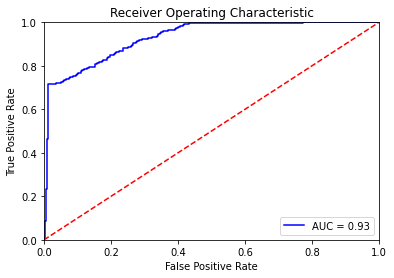

roc_auc :  0.9298011407706168


In [ ]:
#ROC for test
import sklearn.metrics as metrics

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("roc_auc : ",roc_auc)

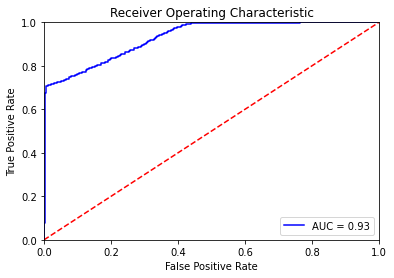

roc_auc :  0.9305585823541035


In [ ]:
#ROC for train
import sklearn.metrics as metrics

probs = clf.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("roc_auc : ",roc_auc)

#Confusion Matrix

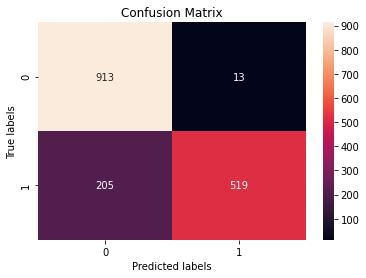

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

##Recall and precision

Train confusion_matrix


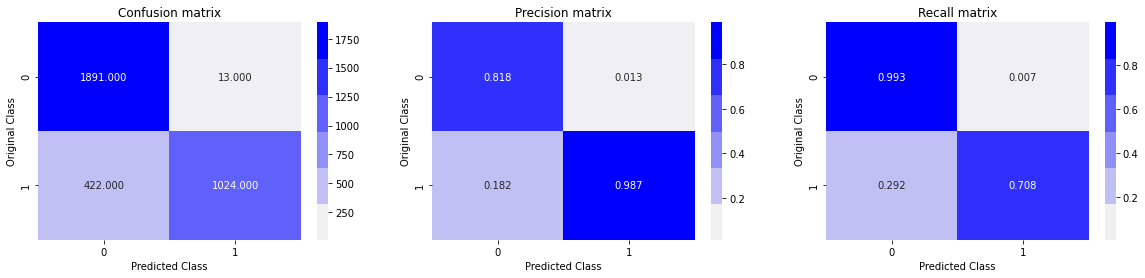

Test confusion_matrix


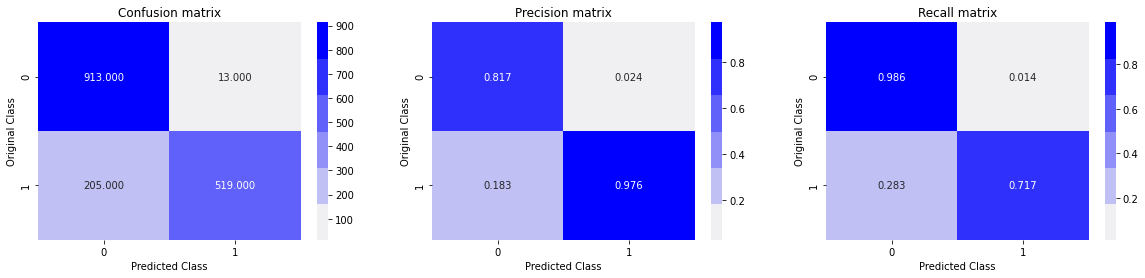

In [ ]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['acess granted', 'access denied']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

acess granted       0.82      0.99      0.89       926
access denied       0.98      0.72      0.83       724

     accuracy                           0.87      1650
    macro avg       0.90      0.85      0.86      1650
 weighted avg       0.89      0.87      0.86      1650



#Support vector machine

In [ ]:
from sklearn.linear_model import LogisticRegression

print("model training on X_train and y_train i.e train dataset \n\n\n")

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

clf_svm = SGDClassifier(loss='hinge',class_weight='balanced',random_state=42, penalty='l2')
clf_svm.fit(X_train, y_train)



model training on X_train and y_train i.e train dataset 





SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = clf_svm.predict(X_test)


from sklearn.metrics import accuracy_score
print("accuracy of the model : ",accuracy_score(y_test, y_pred)*100)

accuracy of the model :  86.9090909090909


###Confusion Matrix

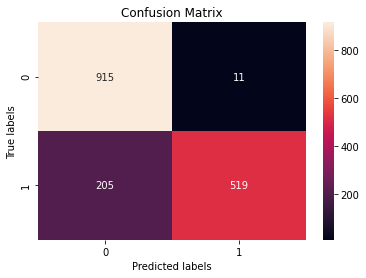

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

###Recall and precision

Train confusion_matrix


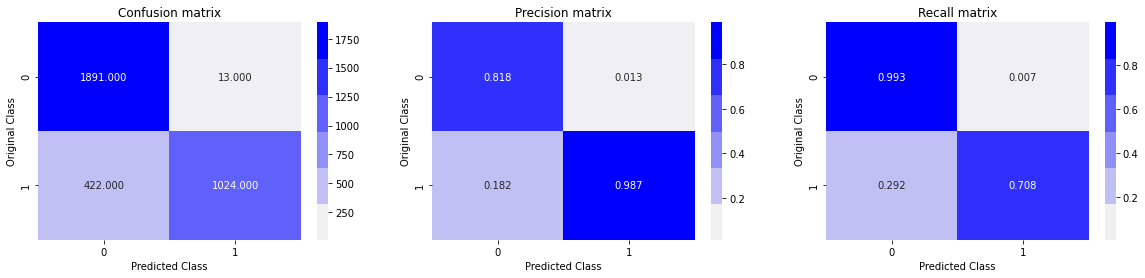

Test confusion_matrix


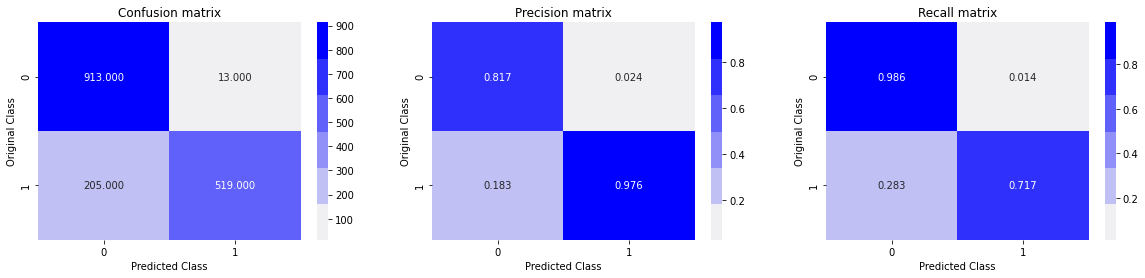

In [ ]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['acess granted', 'access denied']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

acess granted       0.82      0.99      0.89       926
access denied       0.98      0.72      0.83       724

     accuracy                           0.87      1650
    macro avg       0.90      0.85      0.86      1650
 weighted avg       0.89      0.87      0.87      1650

